In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow import keras
from glob import glob
import matplotlib.pyplot as plt

In [2]:
Image_size=256
Batch_size=32
Channels=3
epochs=35

In [3]:
dataset=keras.preprocessing.image_dataset_from_directory(
    "Indian Food Images",
    shuffle=True,
    image_size=(Image_size,Image_size),
    batch_size=Batch_size
)

Found 4000 files belonging to 80 classes.


In [4]:
classnames=dataset.class_names

In [5]:
classnames

['adhirasam',
 'aloo_gobi',
 'aloo_matar',
 'aloo_methi',
 'aloo_shimla_mirch',
 'aloo_tikki',
 'anarsa',
 'ariselu',
 'bandar_laddu',
 'basundi',
 'bhatura',
 'bhindi_masala',
 'biryani',
 'boondi',
 'butter_chicken',
 'chak_hao_kheer',
 'cham_cham',
 'chana_masala',
 'chapati',
 'chhena_kheeri',
 'chicken_razala',
 'chicken_tikka',
 'chicken_tikka_masala',
 'chikki',
 'daal_baati_churma',
 'daal_puri',
 'dal_makhani',
 'dal_tadka',
 'dharwad_pedha',
 'doodhpak',
 'double_ka_meetha',
 'dum_aloo',
 'gajar_ka_halwa',
 'gavvalu',
 'ghevar',
 'gulab_jamun',
 'imarti',
 'jalebi',
 'kachori',
 'kadai_paneer',
 'kadhi_pakoda',
 'kajjikaya',
 'kakinada_khaja',
 'kalakand',
 'karela_bharta',
 'kofta',
 'kuzhi_paniyaram',
 'lassi',
 'ledikeni',
 'litti_chokha',
 'lyangcha',
 'maach_jhol',
 'makki_di_roti_sarson_da_saag',
 'malapua',
 'misi_roti',
 'misti_doi',
 'modak',
 'mysore_pak',
 'naan',
 'navrattan_korma',
 'palak_paneer',
 'paneer_butter_masala',
 'phirni',
 'pithe',
 'poha',
 'poornalu

In [6]:
len(classnames)

80

In [7]:
len(dataset)

125

In [8]:
125*32#every element is a batch of 32

4000

In [9]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[180.92578  157.92578  139.92578 ]
  [181.4768   158.4768   140.4768  ]
  [182.17578  159.17578  141.17578 ]
  ...
  [216.       191.       171.      ]
  [216.       191.       171.      ]
  [216.       191.       171.      ]]

 [[178.55469  155.77734  137.88867 ]
  [178.55469  155.77734  137.88867 ]
  [178.80983  155.96857  138.11185 ]
  ...
  [216.11133  191.11133  171.11133 ]
  [216.15895  191.0637   171.11133 ]
  [216.22266  191.       171.11133 ]]

 [[174.25781  153.25781  136.25781 ]
  [174.04544  153.04544  136.04544 ]
  [173.78018  152.3125   135.54634 ]
  ...
  [217.18555  192.18555  172.18555 ]
  [217.61328  191.75781  172.18555 ]
  [218.18555  191.18555  172.18555 ]]

 ...

 [[237.74219  222.48438  199.66992 ]
  [238.73918  223.94745  202.06517 ]
  [240.50552  226.06216  205.34428 ]
  ...
  [133.65526  113.02635   96.397446]
  [140.19879  118.87315  102.59261 ]
  [150.2168   127.958984 112.14453 ]]

 [[233.44531  215.66797  193.55664 ]
  [234.01758  216.8125   1

In [10]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape, label_batch)

(256, 256, 3) tf.Tensor(
[79  2 25 20 26 46  5 44 44 54 77  2 65 64 46 65 73 33 24 70 46 61 11 49
  3 75 21 14 46 40 20 32], shape=(32,), dtype=int32)


In [11]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape, len(label_batch))

(32, 256, 256, 3) 32


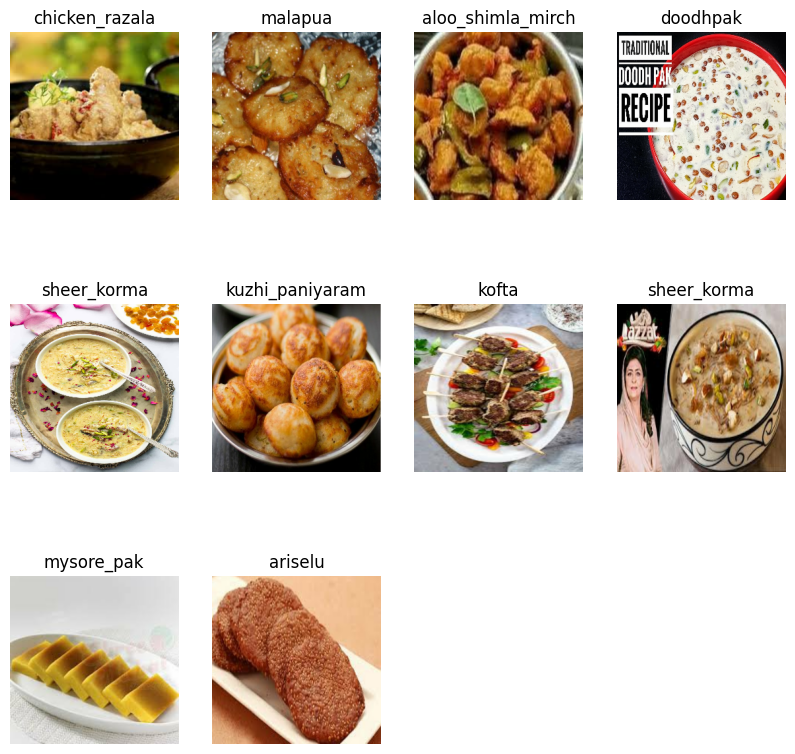

In [12]:
plt.figure(figsize=(10,10))
#for 1st take of batch there are 32 images i want to see the 10 images of 1st batch
for image_batch, labels_batch in dataset.take(1):
    for i in range(10):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))#accepts 3d input
        plt.title(classnames[labels_batch[i]])
        plt.axis("off")

In [13]:
len(dataset)

125

In [14]:
train_size=0.8
len(dataset)*0.8

100.0

In [15]:
train_ds=dataset.take(100)#it will take 1st 100 data as train_ds
len(train_ds)

100

In [16]:
test_ds=dataset.skip(100)
len(test_ds)

25

In [17]:
val_size=0.1
len(dataset)*0.1

12.5

In [18]:
val_ds=test_ds.take(12)
len(val_ds)

12

In [19]:
test_ds=test_ds.skip(12)

In [20]:
len(test_ds)

13

In [21]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [22]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [23]:
len(train_ds)

100

In [24]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
resize_and_rescale = tf.keras.Sequential([
  keras.layers.experimental.preprocessing.Resizing(Image_size, Image_size),
  keras.layers.experimental.preprocessing.Rescaling(1./255),
])

In [26]:
data_augmentation = tf.keras.Sequential([
  keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [27]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [44]:
for image_batch,label_batch in train_ds.take(1):
    print(image_batch[0], label_batch)

tf.Tensor(
[[[178.53004  183.75612  182.15555 ]
  [214.55592  223.48451  227.51324 ]
  [188.22525  195.59322  202.841   ]
  ...
  [127.546326  82.45845   56.2339  ]
  [121.64971   68.780334  21.99986 ]
  [128.64276   74.513245  33.669   ]]

 [[192.4695   200.28519  192.81776 ]
  [201.80072  209.5466   206.09503 ]
  [167.23134  170.13168  170.21703 ]
  ...
  [154.49258   98.73546   50.578823]
  [132.00066   77.20889   34.494564]
  [127.808266  74.01894   29.290737]]

 [[ 86.17937  100.14351   72.19744 ]
  [109.16564  121.94262   95.4176  ]
  [122.243835 132.73242  102.20677 ]
  ...
  [120.88633   65.640854  25.474745]
  [120.51289   67.37387   24.581638]
  [117.812454  66.66802   18.849083]]

 ...

 [[201.53163  204.26276  207.6291  ]
  [189.5069   195.98962  201.31586 ]
  [193.54417  201.82607  210.03139 ]
  ...
  [ 52.907017  39.08208   38.023727]
  [ 66.65425   54.71897   53.03073 ]
  [ 63.249397  52.25866   50.25866 ]]

 [[190.81274  178.96832  170.68947 ]
  [189.11699  184.72568  1

In [28]:
vgg16 = VGG16(input_shape=(Image_size,Image_size,3), weights='imagenet', include_top=False)
for layer in vgg16.layers:
    layer.trainable = False
tmp = Flatten()(vgg16.output)
num_classes=80
prediction = Dense(num_classes, activation='softmax')(tmp)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
history = model.fit(
        train_ds,
        batch_size=Batch_size,
        validation_data=val_ds,
        verbose=1,
        epochs=35,
    )

Epoch 1/35
100/100 [==============================] - 24s 175ms/step - loss: 70.5165 - accuracy: 0.1369 - val_loss: 41.8797 - val_accuracy: 0.4557
Epoch 2/35
100/100 [==============================] - 14s 141ms/step - loss: 41.5407 - accuracy: 0.4622 - val_loss: 39.3057 - val_accuracy: 0.5469
Epoch 3/35
100/100 [==============================] - 14s 141ms/step - loss: 33.2523 - accuracy: 0.5872 - val_loss: 36.1700 - val_accuracy: 0.6172
Epoch 4/35
100/100 [==============================] - 14s 141ms/step - loss: 25.7515 - accuracy: 0.6731 - val_loss: 32.8792 - val_accuracy: 0.6458
Epoch 5/35
100/100 [==============================] - 14s 143ms/step - loss: 22.7245 - accuracy: 0.7106 - val_loss: 29.1892 - val_accuracy: 0.7214
Epoch 6/35
100/100 [==============================] - 14s 142ms/step - loss: 19.4646 - accuracy: 0.7625 - val_loss: 35.6575 - val_accuracy: 0.6979
Epoch 7/35
100/100 [==============================] - 14s 144ms/step - loss: 17.8594 - accuracy: 0.7975 - val_loss: 29

In [32]:
scores = model.evaluate(test_ds)

13/13 [==============================] - 5s 102ms/step - loss: 32.7973 - accuracy: 0.8750


In [33]:
scores

[32.79727554321289, 0.875]

In [34]:
history

In [35]:
history.params

{'verbose': 1, 'epochs': 35, 'steps': 100}

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
history.history['loss'][0]

70.5165023803711

In [38]:
len(history.history['loss'])

35

In [39]:
history.history['loss'][:5] # show loss for first 5 epochs

[70.5165023803711,
 41.54070281982422,
 33.252262115478516,
 25.751482009887695,
 22.724472045898438]

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

first image to predict
actual label: kalakand
1/1 [==============================] - 0s 34ms/step
predicted label: kalakand


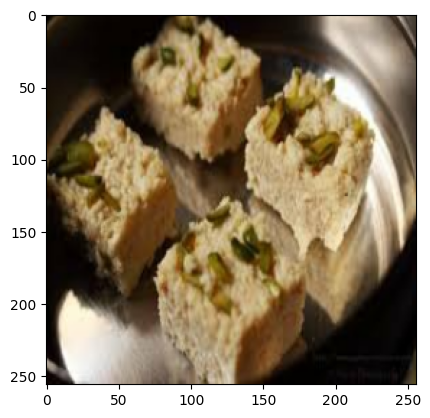

In [49]:
#Prediction on a sample image
import numpy as np
for images_batch,label_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=label_batch[0]
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",classnames[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",classnames[np.argmax(batch_prediction[0])])

In [47]:
import os
model_version=max([int(i) for i in os.listdir("./Model2") + [0]])+1
model.save(f"./Model2/{model_version}")

INFO:tensorflow:Assets written to: ./Model2/3\assets


INFO:tensorflow:Assets written to: ./Model2/3\assets
